In [20]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [21]:
# Load the data
data = pd.read_csv('Whatsapp_Chat.csv')

class CoversationNetwork:
    def __init__(self, data):
        '''
        Initialize the ConversationNetwork class with the chat data.

        Parameters:
        - data: Pandas DataFrame containing columns 'sender' for the chat participants.
        '''
        self.data = data
        self.graph = None
    
    def build_interaction_graph(self):
        '''Build the conversation interaction graph based on message sequences.'''
        G = nx.DiGraph()

        # Create edges based on message sequences
        for i in range(1, len(data)):
            prev_sender = data.iloc[i - 1]['sender']
            curr_sender = data.iloc[i]['sender']

            if prev_sender != curr_sender:
                G.add_edge(prev_sender, curr_sender)
        
        self.graph = G
        return self.graph
    
    def plot_communication_network(self):
        '''Visualize the communication network.'''
        if self.graph is None:
            raise ValueError('Graph is not built yet. Please run build_interaction_graph() first.')
        
        plt.style.use('dark_background')
        plt.figure(figsize=(10, 8))
        pos = nx.spring_layout(self.graph, k=0.5)
        nx.draw_networkx_nodes(self.graph, pos, node_color='#25D366', node_size=7000) # Whatsapp light green
        nx.draw_networkx_edges(self.graph, pos, edge_color='#ECE5DD', arrows=True) # Whatsapp light gray
        nx.draw_networkx_labels(self.graph, pos)
        plt.title('Conversation Interaction Network', fontsize=16, color='#128C7E') # Whatsapp teal green
        plt.axis('off')
        plt.tight_layout()
        plt.show()

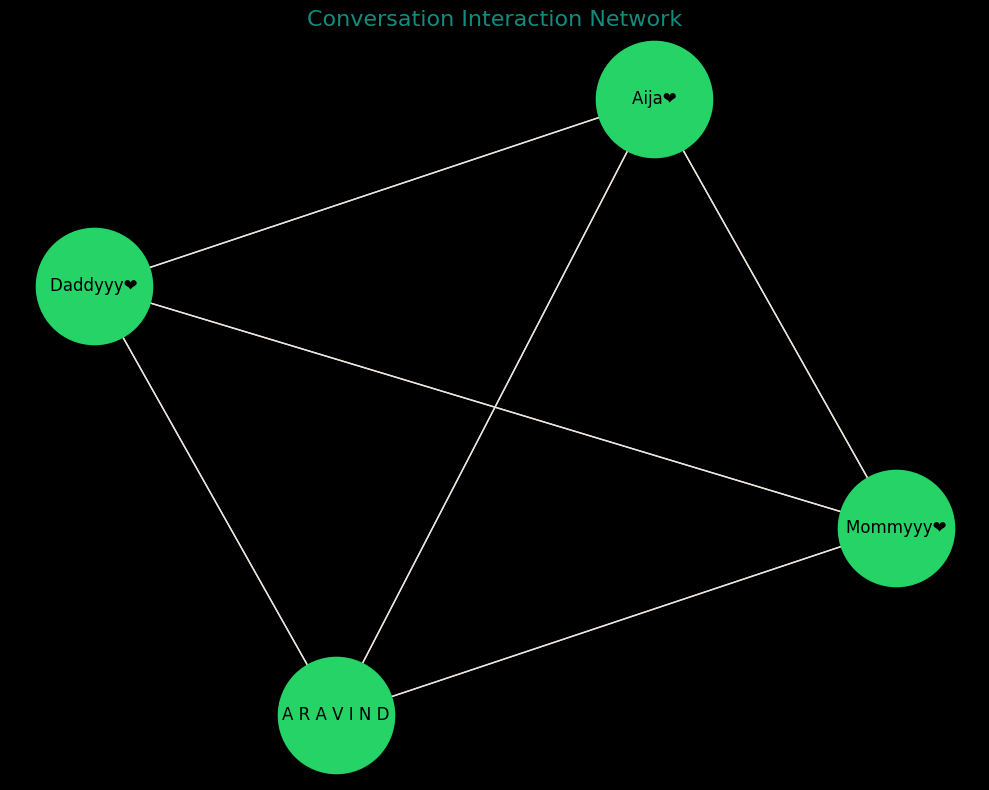

In [22]:
network = CoversationNetwork(data)
network.build_interaction_graph()
network.plot_communication_network()